In [9]:
##IMPORT PACKAGES###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px

In [29]:
###LOAD IN DATA###
df = pd.read_csv(r"C:\Users\Vinnie\Downloads\Stars.csv")

In [60]:
df.head()

,Temperature,Relative Luminosity,Relative Radius,AbsoluteMagnitude,Color,Spectral_Class,Type,Spectral_ClassR,ColorR
0,3068,0.002400,0.1700,16.12,Red,M,0,0,0
1,3042,0.000500,0.1542,16.60,Red,M,0,0,0
2,2600,0.000300,0.1020,18.70,Red,M,0,0,0
3,2800,0.000200,0.1600,16.65,Red,M,0,0,0
4,1939,0.000138,0.1030,20.06,Red,M,0,0,0


In [54]:
##RECODE VARIABLES TO NUMERIC###
def Spectral_Class (series):
    if series == 'M':
        return 0
    if series == 'B':
        return 1
    if series == 'A':
        return 2
    if series == 'F':
        return 3
    if series == 'O':
        return 4
    if series == 'K':
        return 5
    if series == 'G':
        return 6
df['Spectral_ClassR'] = df['Spectral_Class'].apply(Spectral_Class)

In [55]:
###RECODE VARIABLES TO NUMERIC###
def Color (series):
    if series == 'Red':
        return 0
    if series == 'Blue White':
        return 1
    if series == 'White':
        return 2
    if series == 'Yellowish White':
        return 3
    if series == 'Blue white':
        return 4
    if series == 'Pale yellow orange':
        return 5
    if series == 'Blue':
        return 6
    if series == 'Blue-white':
        return 0
    if series == 'Whitish':
        return 1
    if series == 'yellow-white':
        return 2
    if series == 'Orange':
        return 3
    if series == 'White-Yellow':
        return 4
    if series == 'white':
        return 5
    if series == 'yellowish':
        return 6
    if series == 'Yellowish':
        return 3
    if series == 'Orange-Red':
        return 4
    if series == 'Blue-White':
        return 5
df['ColorR'] = df['Color'].apply(Color)

In [61]:
df1 = df.drop(['Spectral_Class', 'Color'], axis=1)

In [62]:
df1.head()

,Temperature,Relative Luminosity,Relative Radius,AbsoluteMagnitude,Type,Spectral_ClassR,ColorR
0,3068,0.002400,0.1700,16.12,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0


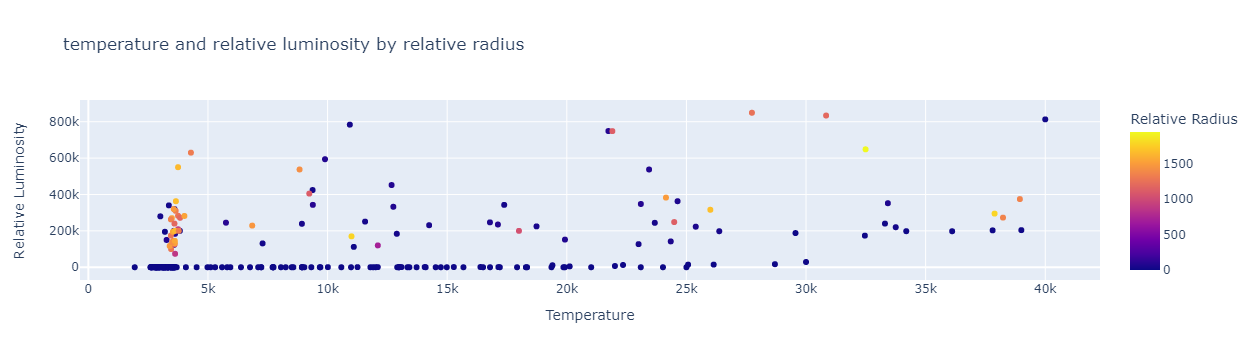

In [36]:
###PLOT###
fig = px.scatter(df, x="Temperature", y="Relative Luminosity", color="Relative Radius", title="temperature and relative luminosity by relative radius")
fig.show()

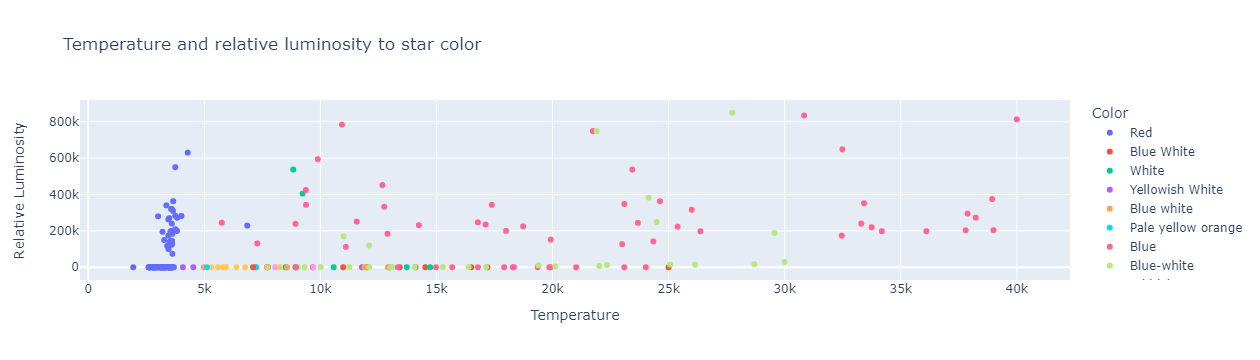

In [35]:
###PLOT###
fig = px.scatter(df, x="Temperature", y="Relative Luminosity", color="Color", title="Temperature and relative luminosity to star color")
fig.show()

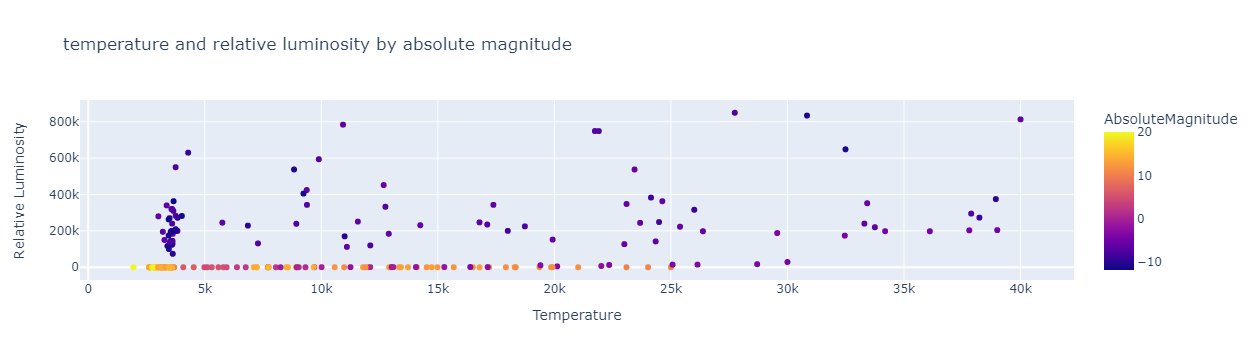

In [37]:
###PLOT###
fig = px.scatter(df, x="Temperature", y="Relative Luminosity", color="AbsoluteMagnitude", title="temperature and relative luminosity by absolute magnitude")
fig.show()

In [63]:
###Scaling dataset to drop the death event in order to predict it later###
scaler = StandardScaler()
scaler.fit(df1.drop('Type', axis=1))
scaledVariables = scaler.transform(df1.drop('Type',axis=1))
dfScaled = pd.DataFrame(scaledVariables, columns=df1.columns[:-1])

In [64]:
##Defining x as the df dataset defined above which doesn't include death event##
##Defining y as death event from the df dataframe which we scaled and called dfScaled##
x = dfScaled
y = df1['Type']

In [65]:
##Fitting training size to 70% of the data and test size to 30% of the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [66]:
#Beginning KNN analysis###
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [67]:
###Developing classification report###
print(confusion_matrix(y_test, pred))

[[13  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  1  6  0]
 [ 0  0  0  0  0 15]]


In [68]:
###75% accuracy with a 75% f1 score, 3/4 of the data was classified with its correct death event###
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        12
           3       0.94      1.00      0.97        17
           4       1.00      0.86      0.92         7
           5       1.00      1.00      1.00        15

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.98        72
weighted avg       0.99      0.99      0.99        72



In [69]:
###CHOOSING THE BEST MODEL AND DEFINING ERROR RATE###
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

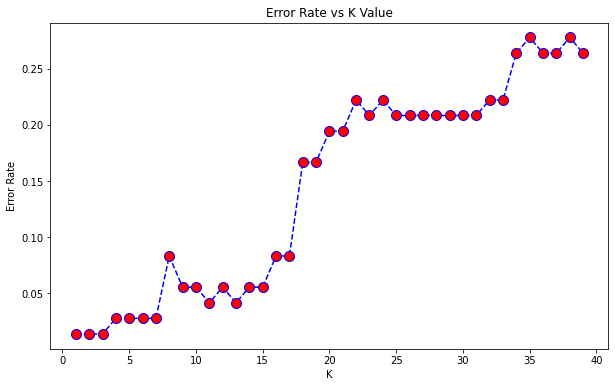

In [70]:
###PLOTTING ERROR RATE AND K MEANS VALUE###
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')